In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline

### What is Clustering


* Clustering analysis, or clustering, is a computational approach to uncover structure in a dataset.

    * Finding groups of points within a dataset that are grouped, or lumped, together

    

* It is a machine learning task.
  * It is said to be unsupervised since the analyst does not describe or provide examples of things that should belong together in a cluster.
  * Supervised machine learning provides labeled data (e.g., instances of spam email vs. ham, or legit email) and trains model to recognize if an email is either spam or ham.

### What is a Cluster?

* Descriptions such as “groups of points that are similar” or “close to each other”

* The notion of a “cluster” is not well defined 
  * Clusters may be at times subjective
    * What the concept of boundary around  a set of similar points is subjective
    
* Once we see cluster we "kind of" know what it is
  * Ex. Do any two points that very similar form a cluster
  
<img src="https://www.dropbox.com/s/8v2uvd1mzzwmou7/cluster_def.png?dl=1" width="400">
<center>
Data clustering: 50 years beyond K-means, Jain 2009
</center> 

### Question

* Is a cluster simply a group of points that are close?
* How can you generate points that are distributed like in the graph below?


<img src="https://www.dropbox.com/s/kwgzpkyn0btikgl/random_points.png?dl=1" alt="drawing" width="300"/>



In [4]:
x_axis = np.random.choice(np.arange(100), size=100)
y_axis = np.random.choice(np.arange(100), size=100)

print(x_axis[0:5])
print(y_axis[0:5])

[11 37  8 57 27]
[82 81 41 89 41]


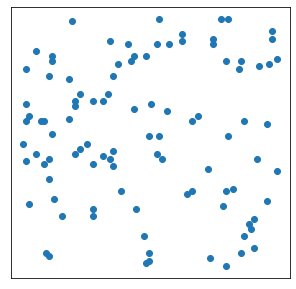

In [5]:
plt.figure(figsize=(5, 5))
plt.scatter(x_axis, y_axis)

# I used the code below to remove the x and y axis ticks ()
_ = plt.xticks([], [])
_ = plt.yticks([], [])

### What is a Cluster? - Cont'd

- We can define a cluster as a contiguous region of high data point density
  - Points in the region are close to each other.
  - Areas contain more than just a few points that seem to occur randomly together.
- Regions are separated by areas of lower point density
  - Points across regions are dissimilar
  
 <img src="https://www.dropbox.com/s/zyi30gcfhbzfulp/two_well_defined_clusters.png?dl=1" alt="drawing" width="200"/>



### What is a Cluster? - Cont'd
    
<img src="https://www.dropbox.com/s/zyi30gcfhbzfulp/two_well_defined_clusters.png?dl=1" alt="drawing" style="width:400px;"/>


* How can we generate a dataset like the one above
  * See in code below
  * involves sampling from a gaussian distributions


In [6]:
mean_c1 = [8, 12]
cov_c1 = [[1,0], [0, 1]]
c1 = np.random.multivariate_normal(mean_c1, cov_c1, 40)

mean_c2 = [4, 4]
cov_c2 = [[1,0], [0, 1]]
c2 = np.random.multivariate_normal(mean_c2, cov_c2, 29)

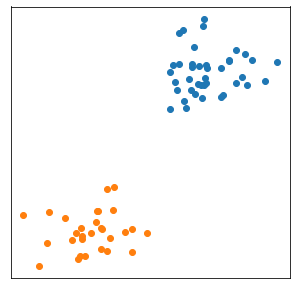

In [7]:
plt.figure(figsize=(5, 5))

plt.scatter(c1[:,0], c1[:, 1])
plt.scatter(c2[:,0], c2[:, 1])

plt.xticks([], [])
_ = plt.yticks([], [])

### What is a Cluster - Cont'd

- Contiguous regions of high data point density need not be highly dissimilar
  - On average, points across regions are dissimilar
  - Some points may be closer than others
  
 <img src="https://www.dropbox.com/s/udeg22vvrzwkqae/two_cluster_less_well_defined.png?dl=1" alt="drawing" style="width:300px;"/>

### Data Shapes

* Clusters may have complicated shapes
  * While the clusters above are orderly but real clusters can be *very* messy
  * Some clusters do not subscribe to the definitions above 
  * Such clusters may challenge simple approaches

 <img src="https://www.dropbox.com/s/aj99oktcxc3dpxp/data_moons.png?dl=1" alt="drawing" style="width:700px;"/>

### Applications of Clustering

* Clustering can be applied in a variety of contexts, from genetics and genomics to user input consolidation and investment
* Definition of the clusters across domains is the same
  * Regions of high-density points where points characterized by high similarity within regions and low similarity across regions  
  * Naturally, the concept of similarity and distance between points is domain-specific
    * Similarity between two Netflix users can be defined as the degree of agreement on ratings of movies they watched
      * Or just the movies they watched.
    * The similarity between two stocks, say apple, qualcom
        * Useful to the diversification of portfolios

### Ex. Data Reconciliation

* Very useful for finding groups of different values that might be alternative representations of the same thing
  * Also used for spotting errors, typos, and inconsistencies

* This is called reconciliation and can be a massive problem for some industries


<img src="https://www.dropbox.com/s/djz78gqdr1izotd/Clustering_strings.png?dl=1" alt="drawing" width="500"/>

    


### Ex. Stocks Clustering

* Useful to derive a strategy for assets diversification

<img src="https://www.dropbox.com/s/dg3uh30ty6vrk3u/stocks_clusters.png?dl=1" alt="drawing" style="width:700px;"/>


### Ex. Market Segmentation

* Who are my potential customer groups?

  * Who is buying my app and what features should be most appropriate?

<img src="https://www.dropbox.com/s/efa5d3vemfz01xt/market-segmentation.png?dl=1" alt="drawing" style="width:500px;"/>


### Distance and Similarity Measures 
  
* A distance is any function, `d`,  that takes two points (`x` and `y`) and returns a scalar value that is a measure for how different these points are
  * The more dissimilar the points, the larger the distance 
  * It may be easier to make more sense to compute a similarity using a function `s`
    * s(x, y) can be easily converted into d(x,y)
    
* While data points do not have to be embedded into a geometric space, it helps to think about their distance (or similarity) as if they were
  * If we can transform data points to have properties of a vector space then we can develop more efficient algorithms that exploit these properties


### Question 

  * How can you converte a normalized similarity into a distance?
    * similarity is in [0,1] 
    
    
<img src="https://www.dropbox.com/s/5deolbibqg0k5ga/dist_sim.png?dl=1" alt="drawing" style="width:600px;"/>

    

### Other methods 

* there are various other methods for converting similarity to ditnace. 
* For example
  * $-\log(\text{similairity})$
  * $\sqrt{(1 - \text{similairity})}$
  * etc.


![](https://www.dropbox.com/s/zob1wgzvjei4hw6/dist_to_sim.png?dl=1)






In [ ]:
plt.figure(figsize=(22,6))

similairity = np.arange(0,1.01, 0.01)
method_1 = 1-similairity

plt.subplot(2,2, 1)

plt.plot(similairity, method_1)
# plt.xlabel("Similarity", fontsize=18)
plt.ylabel("distance", fontsize=18)
_ = plt.xticks(fontsize=14)
_ = plt.yticks(fontsize=14)

plt.subplot(2,2, 2)


method_2 =  -np.log(similairity + 0.0001)
plt.plot(similairity, method_2)
plt.xlabel("Similarity", fontsize=18)
plt.ylabel("distance", fontsize=18)
_ = plt.xticks(fontsize=14)
_ = plt.yticks(fontsize=14)



plt.subplot(2,2, 3)

method_3 =  np.sqrt(1 - similairity)
plt.plot(similairity, method_3)
plt.xlabel("Similarity", fontsize=18)
plt.ylabel("distance", fontsize=18)
_ = plt.xticks(fontsize=14)
_ = plt.yticks(fontsize=14)

### Distance and Similarity Measures - Cont'd

* Sometimes, the concept of distance in geometric space is clear

  * Example, Use any measure that considers the locations of the points in such a space
  * Most points are not just in 2-d but exist in higher-dimensional space
  
<img src="https://www.dropbox.com/s/xgi9i6hjskklvds/distnace_a_b.png?dl=1" alt="drawing" style="width:500px;"/>
  
    
* Oher times, there is no obvious choice as to how to compute the distance between two points
  * You are clustering music genres. How do you compute the distance between two songs?
  * You need to convert the song into features  
    * Identify relevant dimensions
    * e.g., Beats per second, the proportion of various instruments soloing, properties of the lyrics or presence/absence of certain words, etc...
    

### Music Genres
<img src="https://www.dropbox.com/s/tybdrop2kpb1fc5/music_genres.png?dl=1" width=350/>
<center>Genre Complexes in Popular Music. Silver et al., Plos One, 2016</center>

### Common Distance Metrics 

* For simplicity, we'll classify the distances into two high-level categories
  * Euclidean and spherical geometry distances
    * Use the location of the points in space to estimate their distance
  * Other 
      * Non-euclidean and non-spherical geometry distances
    * Use properties of points to estimate their distance
* This is a coarse and somewhat subjective categorization, and other classifications are possible.



* Most common distance measure.

* The Euclidean distance, 

 * Distance between two points P and Q with coordinate $(p_1,p_2)$ and $(q_1,q_2)$ respectively is:

$$
d_{pq} = \sqrt{(p_1-q_1)^2 + (p_2-q_2)^2}
$$


### Euclidean and Spherical Distances - Cont'd 

* The Manhattan (or taxicab) distance
* Geodesic distance
  

<img src="https://www.dropbox.com/s/o4ylcqi43cwn33b/distances.png?dl=1" alt="drawing" style="width:600px;"/>


### Non-Euclidean Distance

Examples of non-euclidean distances are: 

* Edit distance or number of inserts and deletes to change one string into another
  * Example, what is the distance between `x = AGACGTAG` and  `y = GTTCAGA`

<img src="https://www.dropbox.com/s/xl1gj2nvzhrjtas/edit_distance.png?dl=1" alt="drawing" style="width:900px;"/>

    * Remove A, convert A to T, ... 
    * The distance between `x` and `y` is 5

* Jaccard distance
    * Used with sets. It computes the number of items shared over all the items in the set.





### Non-Euclidean Distance: Jaccard Distance

<img src="https://www.dropbox.com/s/m01tcw8gdfr4qry/jaccard.png?dl=1" alt="drawing" style="width:500px;"/>


In [12]:
symptoms = ["Muscle Cramps", "Weight Gain", "Easy Bruising","Metallic Taste","Paranoia","Leg Pain","Gas and Bloating","Mouth Sores","Nausea, Upset Stomach","Rectal Bleeding","Shortness of Breath","Muscle Cramps","Urine Odor","Swollen Ankles and Feet","Joint Cracking","Eye Twitch","Dry Skin"]

patient_ids =  pd.util.testing.rands_array(6, 20)
patient_ids



array(['mu2cAI', 'LL3F3w', '31MBYv', 'Fxophr', 'UUS84c', 'PlZcgc',
       'rtPjRW', 'GOXiWP', 'bejGrB', 'T56kIM', 'eYNb6c', 'FCiStT',
       'IBycGD', 'LJs64c', 'Mj4IMo', 'G18bhX', 'jBZqZS', 'ucFBig',
       'KhAoEe', 'ixeIjH'], dtype=object)

In [13]:
patient_outcomes = np.random.choice([0, 1], size=(len(symptoms)))            
patient_outcomes

array([1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0])

In [14]:
data = [np.random.choice([0, 1], size=(len(symptoms)))  for _ in range(len(patient_ids))]
data

[array([1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1]),
 array([0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]),
 array([1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0]),
 array([1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0]),
 array([0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0]),
 array([0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0]),
 array([0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0]),
 array([1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]),
 array([0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0]),
 array([0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1]),
 array([0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1]),
 array([0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1]),
 array([0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1]),
 array([1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0]),
 array([1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1]),
 array([1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0]),
 array([1, 1, 1, 1, 1, 0

In [15]:
patients_data = pd.DataFrame(columns=symptoms, data=data, index=patient_ids)
patients_data.head()


,Muscle Cramps,Weight Gain,Easy Bruising,Metallic Taste,Paranoia,Leg Pain,Gas and Bloating,Mouth Sores,"Nausea, Upset Stomach",Rectal Bleeding,Shortness of Breath,Muscle Cramps,Urine Odor,Swollen Ankles and Feet,Joint Cracking,Eye Twitch,Dry Skin
mu2cAI,1,0,1,0,0,1,1,1,1,0,1,0,1,1,1,0,1
LL3F3w,0,0,1,0,1,0,1,1,1,1,1,1,1,1,1,1,1
31MBYv,1,0,0,0,1,0,1,0,0,1,1,0,0,0,1,0,0
Fxophr,1,1,0,1,1,1,1,1,1,1,0,0,0,0,0,1,0
UUS84c,0,1,1,0,0,1,1,0,0,1,0,0,1,0,1,0,0


In [20]:
vec_1 = np.array([1, 0, 1, 1, 1])
vec_2 = np.array([1, 0, 0, 1, 1])


(vec_1 == vec_2) 

array([ True,  True, False,  True,  True])

In [23]:
x = np.array([ True,  True,  False])
y = np.array([ True,  False, True])

x & y

array([ True, False, False])

In [16]:
vec_1 = np.array([1, 0, 1, 1, 1])
vec_2 = np.array([1, 0, 0, 1, 1])


sum((vec_1 == vec_2) & (vec_1 == 1))


3

In [17]:
vec_1 = np.array([1, 0, 1, 1, 1])
vec_2 = np.array([1, 0, 0, 1, 1])


sum((vec_1 == 1) | (vec_2 == 1))


4

In [18]:
def compute_Jaccard_distance(vec_1, vec_2 ):
    
    # All the symptoms shared by both
    intersection = sum((vec_1 == vec_2) & (vec_1 == 1))
    # All the symptoms that either one has
    union = sum((vec_1 == 1) | (vec_2 == 1))
    return 1 -  intersection / union
    

In [19]:
vec_1 = np.array([1, 0, 1, 1, 1])
vec_2 = np.array([1, 0, 0, 1, 1])


print(compute_Jaccard_distance(vec_1, vec_2 ))

0.25


### Distance Matrix

* Common to store the pair-wise distances between data points in a distance matrix $M$

* The matrix has a dimention $n \times n$, where n is the number of data points

* For any two points $p_i$ and $p_j$, 


$$ 
M[i, j] = d(p_i, p_j) \\
M[j, i] = d(p_i, p_j)
$$
  


In [52]:
np.random.seed(42)
dist_patients = np.zeros([3, 3])
dist_patients


array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [59]:
# Compute All Pair-Wise Jaccard Coefficients
dist_patients = np.zeros([len(patient_ids), len(patient_ids)])

for i in range(patients_data.shape[0]):
    for j in range(i, patients_data.shape[0]):
        vec_1 = patients_data.iloc[i]
        vec_2 = patients_data.iloc[j]

        # compute distance and round to two decimal points
        dist_patients[i, j] = round(compute_Jaccard_distnace(vec_1, vec_2 ), 2)
        dist_patients[j, i] = dist_patients[i, j]
        
dist_patients

array([[0.  , 0.4 , 0.69, 0.69, 0.62, 0.54, 0.6 , 0.77, 0.93, 0.43, 0.6 ,
        0.53, 0.47, 0.42, 0.47, 0.5 , 0.65, 0.57, 0.43, 0.62],
       [0.4 , 0.  , 0.64, 0.65, 0.67, 0.38, 0.47, 0.88, 0.71, 0.4 , 0.56,
        0.4 , 0.33, 0.6 , 0.44, 0.56, 0.44, 0.43, 0.5 , 0.4 ],
       [0.69, 0.64, 0.  , 0.67, 0.7 , 0.6 , 0.67, 0.78, 0.78, 0.69, 0.86,
        0.79, 0.71, 0.73, 0.71, 0.67, 0.5 , 0.75, 0.87, 0.79],
       [0.69, 0.65, 0.67, 0.  , 0.69, 0.8 , 0.33, 0.5 , 0.64, 0.69, 0.57,
        0.6 , 0.62, 0.71, 0.43, 0.57, 0.53, 0.54, 0.69, 0.6 ],
       [0.62, 0.67, 0.7 , 0.69, 0.  , 0.64, 0.58, 0.8 , 0.8 , 0.5 , 0.69,
        0.71, 0.54, 0.64, 0.81, 0.69, 0.64, 0.86, 0.71, 0.62],
       [0.54, 0.38, 0.6 , 0.8 , 0.64, 0.  , 0.62, 0.92, 0.7 , 0.64, 0.62,
        0.64, 0.46, 0.67, 0.57, 0.62, 0.57, 0.79, 0.64, 0.54],
       [0.6 , 0.47, 0.67, 0.33, 0.58, 0.62, 0.  , 0.75, 0.64, 0.5 , 0.46,
        0.69, 0.53, 0.8 , 0.43, 0.57, 0.53, 0.64, 0.76, 0.6 ],
       [0.77, 0.88, 0.78, 0.5 , 0.8 , 0.9

In [60]:
from numpy import unravel_index

print(np.max(dist_patients), np.argmax(dist_patients))

print(unravel_index(np.argmax(dist_patients), dist_patients.shape))

# dist_patients[dist_patients==0] = 10000

# Use nanmin, nanmax, nanargmin and nanargmax 
print(np.nanmin(dist_patients), np.nanargmin(dist_patients))
print(unravel_index(np.argmin(dist_patients), dist_patients.shape))


0.93 8
(0, 8)
0.0 0
(0, 0)


In [61]:
patients_data.iloc[[0,8]]


,Muscle Cramps,Weight Gain,Easy Bruising,Metallic Taste,Paranoia,Leg Pain,Gas and Bloating,Mouth Sores,"Nausea, Upset Stomach",Rectal Bleeding,Shortness of Breath,Muscle Cramps,Urine Odor,Swollen Ankles and Feet,Joint Cracking,Eye Twitch,Dry Skin
mu2cAI,1,0,1,0,0,1,1,1,1,0,1,0,1,1,1,0,1
bejGrB,0,1,0,0,1,0,0,1,0,1,0,1,0,0,0,0,0


In [62]:
dist_patients_temp = dist_patients.copy() 
for i in range(patients_data.shape[0]):
    dist_patients_temp[i,i] = 1000
    
print(np.nanmin(dist_patients_temp), np.nanargmin(dist_patients_temp))
print(unravel_index(np.argmin(dist_patients_temp), dist_patients_temp.shape))


0.31 295
(14, 15)


In [63]:
patients_data.iloc[[14,15]]


,Muscle Cramps,Weight Gain,Easy Bruising,Metallic Taste,Paranoia,Leg Pain,Gas and Bloating,Mouth Sores,"Nausea, Upset Stomach",Rectal Bleeding,Shortness of Breath,Muscle Cramps,Urine Odor,Swollen Ankles and Feet,Joint Cracking,Eye Twitch,Dry Skin
Mj4IMo,1,0,1,1,1,1,1,1,1,0,1,1,0,0,0,1,1
G18bhX,1,0,1,1,0,1,1,0,1,0,1,1,0,0,1,1,0


###  Devising you Own Distance

* There are certain properties that a distance (or similarity) function should have
  * A distance in a mathematical sense must have at least the following properties 

$$
d(x, y) \ge 0 \\
d(x, y) = d(y, x) \\
d(x, y) + d(y, z) \ge d(x, z)
$$ 

* In practice, it may be hard to identify a distance that guarantees  triangle inequality
  * Some metrix are not symmetric
     * E.g., length of the shortest clockwise path between $p$ and $q$ 
  * Some relatively good metrics are not transitive

  * For technical reasons, the symmetry property is usually highly desirable. 
    * You can always construct an asymmetric distance function from an asymmetric one

$$
    dS(x,y)= \frac{d(x,y)+d(y,x)}{2}
$$

### Smooth Function are Better thatn Non-Smooth Ones

* Naive distance

$$
d(x,y) = \sum{d_i(x_i, y_i)}~~\mbox{where,}\\
d_i(x_i, y_i)= \left\{
    \begin{array}{ll}
        1 & \mbox{if } x=y \\
        0 & \mbox{otherwise}
    \end{array}
\right.
$$

* This function is not smooth
  * Difference between `[1,2]` and `[2,3]` is the same the difference between `[1,2]` and `[100, 200]`
  


### Clusting approaches


*  We discussed pairwise similarity/distance but how can we use it in the context of clustering?

* Simply idea: we describe clusters are groups (lumps) of data points such that the similarity within cluster is high and the similarity across cluster is low
   * Or, dissimilarity is low within clusters and high across clusters

* In this section, will cover two approaches to clustering a set of points into  clusters

* There is two simple strategies that leverage this idea.
  1. Explicity define the number of cluster ($k$) and assign points to each cluster such that description above is satisfied.
  2. Iteratively combine (merge) similar clusters (strating with points) and later on, find which iteration led to merging cluster that were too distant.


### Clustering Approaches - Cont'd 

1. Hierarchical 
  * Each point is a cluster
  * Repeatedly combine the two “closest” clusters into one
  * Stop when only one cluster remains
  * This is also known as "agglomerative hierarchical clustering"
  
2. Point-to-cluster Assignment
  * Maintain a set of k clusters (ex `k = 3`)
  * Place points into “closest” cluster
    * iteratively repeat the process until the solution is stable
    
* There more advanced/complex approaches
  * Difficult to classify into categories because of the diversity and overlaps between approaches
  * Probabilistic methods increasingly popular 


### Hierarchical Clustering - Cont'd

* Repeatedly combine the two “closest” clusters into one

* How do you know which pair of clusters is the closest
  * We can only compute our distances between two points

* One possible solution: 
    * represent the location of each cluster using a single measure:
    * E.g., centroid, or the average of all points in a cluster

* Take all centroids and find the closest pair      

### Hierarchical Clustering

<img src="https://www.dropbox.com/s/pvsw16v49j1a9m4/hierarchical_clustering.png?dl=1" alt="drawing" style="width:600px;"/>



### Hierarchical Clustering Dendogram Representation

<img src="https://www.dropbox.com/s/xyohvxzsgwkeo1d/hierarchical_clustering_dendo.png?dl=1" alt="drawing" style="width:700px;"/>



### Question

* Does the centroid approach work for all types of data? For example, how do you compute the centroid for:
  * A collection of two tweets?
  * A collection of songs? 

* We can still compute a consensus, but this idea may not make much sense in the context

### Hierarchical Clustering with Non Eclidean Distances

* There is no “average” of two points

* We can compute the distance between two clusters using other approaches. For example:
    
  * Minimum of the distances between any two points one from each cluster
    * Minimum Linkage
  * Maximum of the distances between any two points one from each cluster
    * Maximum Linkage
  * Average of the distances between any two points in each cluster
    * Average Linkage

* Pick a notion of “cohesion” of clusters, e.g., the maximum distance from the clustroid 

  * A centroid is simply the center of the cluster based on, for example, the average of intra-cluster distances



### Question:

* Given $n$ data points, what is the complexity of clustering in the worst case scenario?
* Recall we need to:
  1- build the distance matrix
  2- Merge n points iteratively until we end up with a single cluster




### Challenges and tricks for Hirarchical Clustering

* The algorithm has cubic complexity $O(n^3)$
  * We need to do n-1 merging operations, each of which requires parsing the complete matrix to find the closest pair of points.

* Suggestions to reduce complexity:
  * Start by dereplicating observations is possible
    * Use some similarity estimation method, such as hashing to find very similar clusters and represent those using a centroid prior to starting the computation.
  * We should store similarity in a sparse data structure. 
    * Ex. use a hash table, instead of a matrix.


### Hierarchical Clustering Results

* Pros: 
  * Easy to implement and compute
  * Easy to interpret
  * No choice of number of clusters

* Cons: 
  * Method is computationally intensive (minus)
  * Extracting clusters can tricky! (minus)
     * Data points are leaves 
     * Distance in the tree between the leaves is representative of the distance between the data points
 




## Second Category: Assigning Points to Clusters

* A popular clustering algorithm

* Two steps
  * Define the number of cluster _a-priori_
  * Initializing cluster representatives
  * Assignment of points to the cluster based on their proximity to the cluster representative
  * Recalculating the centroids



### Kmeans Clustering Steps

<img src="https://www.dropbox.com/s/sbfedy63m3krllm/kmeans_a.png?dl=1" width="300"/>



### k-Means Clustering: Initialization

* Initialize clusters by $k$ points; one per cluster
  * Those are the cluster representatives; the cluster centroids
     * For instance, take $k$ points in space at random
  
<img src="https://www.dropbox.com/s/ovkur4oeb5r3p9m/kmeans_b.png?dl=1" width="300"/>

### k-Means Clustering: Assign points to clusters

* Place each point in the cluster identified with by the closest centroid

  * Here, we "paint" the examples the same color as the cluster centroid to which it was assigned
  
<img src="https://www.dropbox.com/s/i8ueidywma580a0/kmeans_c.png?dl=1" width="300"/>




### k-Means Clustering: Recalculating the centroids

* After all points are assigned, recompute the centroids of the $k$ clusters

<img src="https://www.dropbox.com/s/msdd7jlf9vq4cje/kmeans_d.png?dl=1" width="300"/>


### k-Means Clustering: Assign and Recalculate Centroids 

* Repeat these two steps until convergence

  * The clustering is stable, and nothing changes.
      * i.e., computing assigning the points to the closest centroid and recomputing the centroids does not change the centroids or the assignments



### k-means Clustering: Pros and Cons - Cont'd

* Pros
  * Computationally more tractable $O(kn)$
    * linear in the number of points!
    * Typically requires a small number of iterations to converge (10–50 iterations are typical)


  * Can be adjusted to take other methods 
    * Can use k-medoid (insted of means), 
      * A medoid is the point in the cluster with the smallest distance to all the other points in the cluster.
      * Makes it more stable and less affected by outliers
      * Useful if we need a realistic cluster representative


  * Works relatively well in real life.


### k-means Clustering: Pros and Cons - Cont'd

* Cons
  * Algorithm is non-nondeterministic
    * A different choice of starting values may result in a different assignment of points to clusters
      * Customary to run the k-means algorithm several times and compare results or compute a consensus
  * Cannot be used with categorical data (non-Euclidean space)
    * Difficult, or sometimes impossible, to construct centroids from categorical data
  * Can take a long time to converge with some poor initializations 
    * Very rare, but a possibility, nevertheless 
    * Typically due to the fact that centroid are extremely similar
  * Works only with hyper spherical well separated clusters. 
* Computationally quadratic in time and space


### K-Means: Divide and Conquer using Map Reduce

<img src="https://www.dropbox.com/s/qjpczkv6g9moyu1/kmeans_single.png?dl=1">

### Kmeans: Divide and Conquer using Map Reduce



1. Centroids are distributed across multiple nodes.
2. The file is chunked and fed into the map function.
3. For each instance, find the nearest centroid and assign the point to it (Figure 2 illustrates the process)
4. filter instances by centroid and recompute the new centroid

### How Do We Evaluate the Results of Cluster Analysis

* So far, cluster selection is still manually carried out.
  * Need to find where to cut in the hierarchical clustering
  * Need to choose the number of clusters, prior to starting the clustering.

  * Both tasks can benefit from domain knowledge
    * We need to understand the intricacies of the data at hand.

* Some methods can facilitate the identification of clusters.
  * Question: We need to be able to numerically score a clusering solution

* Can we use the total sum of squares distance to the centroids?

### How Do We Evaluate the Results of Cluster Analysis

![](https://www.dropbox.com/s/7h7obww67ud4u8e/SSE_clusters.png?dl=1)


### How Do We Evaluate the Results of Cluster Analysis

* The sum of square errors is dependent on the feature scales
  * Obscure meaning and difficult to interpret.

* Recall that what we want is:
  1. Points within the same cluster should be very similar; 
     * The average distance between points in the same cluster should be small
     * This is called *cohesion* and it should be relatively small
       * Think of it as the average distance between points in the same cluster
       * Counter intuitive naming since we talk about cohesion as a "good" thing

  2. Points across clusters should be highly dissimilar; 
      * Distnace between between points from distinct clusters should be large
      * This is called *separation* and it should be relatively large
  
* A clustering numerical solution could be expressed

$$
    \frac{separation}{cohesion}
$$ 

* Large separation compared to low cohesion
   * Large values are indicative of a good separation 


### The Silhouette Coefficient

* The Silhouette Coefficient is a "score" to estimate the ratio of separation to cohesion

* For each point $i$ in a cluster we denote:
  * $a_i$ is the average distance that point $i$ has from all points in the same cluster
    * Represents the cohesion; we want it to be as small as possible   
  * $b_i$ be the smallest distance between point $i$ and a point not in the same cluster as $i$
    * Represents separation we want it to be as large as possible 
    


### The Silhouette Coefficient - Cont'd

* We measure the Silhouette Coefficient of a point $i$ as 

$$
S_i = \frac{b_i - a_i}{m(a_i, b_i)}
$$

* Silhouette coefficient ranges from −1 to 1
  * Negative values indicate $a_i$ is larger than b_i
    * Low cohesion or small separation or both
    * This suggests poor clustering
  * Positive values indicate $b_i$ is larger than $a_i$
    * high cohesion or high separation or both
    


### Cluster-Wide Silhouette Coefficient

$$
\sum_{i=1}^{|C_i|} \frac{S_i}{|C_i|},
$$


where $|C_i|$ is the number of observations in cluster $i$


* The average silhouette coefficients within the cluster $|C_i|$
  * A good indicator of the quality of the entire cluster
  * Same observations as before:
    * Large poisitive values denote good separation
    * Negative values denote low cohesion, poor separation or both.


In [66]:
np.random.multivariate_normal?

([], [])

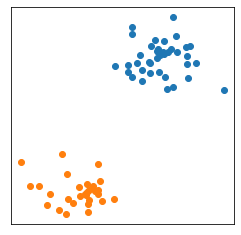

In [5]:
mean_c1 = [8, 12]
cov_c1 = [[1,0], [0, 1]]
c1 = np.random.multivariate_normal(mean_c1, cov_c1, 40)

mean_c2 = [4, 4]
cov_c2 = [[1,0], [0, 1]]
c2 = np.random.multivariate_normal(mean_c2, cov_c2, 29)



plt.figure(figsize=(4,4))
plt.scatter(c1[:,0], c1[:, 1])
plt.scatter(c2[:,0], c2[:, 1])

plt.xticks([], [])
plt.yticks([], [])


In [6]:
from scipy.spatial import distance

def compute_b(pt_cl1, c2):
    # Closest points across cluster distant points
    min_dist = np.inf
    hit_pt_c1, hit_pt_c2 = (None, None)
    
    for j, pt2 in enumerate(c2):
        d = distance.euclidean(pt_cl1, pt2)
        if d < min_dist:
            min_dist = d
            hit_pt_c2 = pt2
    return hit_pt_c2,  min_dist


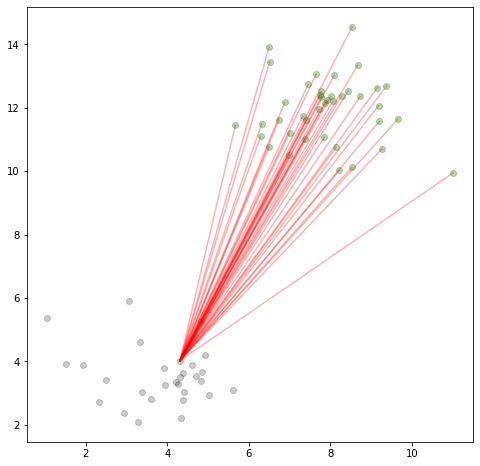

In [22]:
pt_cl1 = c2[10]
plt.figure(figsize=(8,8))
plt.scatter(c1[:,0], c1[:, 1], c="green", alpha=0.3)
plt.scatter(c2[:,0], c2[:, 1], c='black', alpha=0.2)


for other_pt in c1:
    plt.plot([pt_cl1[0], other_pt[0]], [pt_cl1[1], other_pt[1]], 'r-', alpha=0.3)
        

In [23]:
compute_b(pt_cl1, c2)

(array([4.31315346, 4.02649997]), 0.0)

In [24]:
c1_pt2

array([4.31315346, 4.02649997])

([], [])

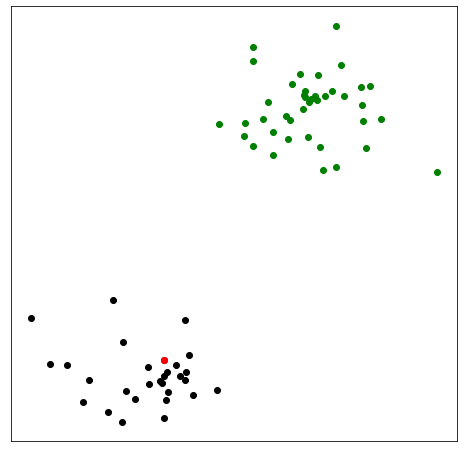

In [36]:
c1_pt2, x = compute_b(pt_cl1, c2)
c1_pt1 = None
plt.figure(figsize=(8,8))
plt.scatter(c1[:,0], c1[:, 1], c="green")
plt.scatter(c2[:,0], c2[:, 1], c='black')
#plt.scatter(c1_pt1[0], c1_pt1[1], color='red')
plt.scatter(c1_pt2[0], c1_pt2[1], color='red')
plt.xticks([], [])
plt.yticks([], [])

#plt.plot([c1_pt1[0], c1_pt2[0]], [c1_pt1[1], c1_pt2[1]], 'ro-')


In [30]:
def compute_a(cluster, target_pt_id):
    distances = []
    for other_pt_id in range(len(cluster)):
        if  target_pt_id != other_pt_id:
            distances.append(distance.euclidean(cluster[target_pt_id], cluster[other_pt_id]))
    return np.mean(distances)
        

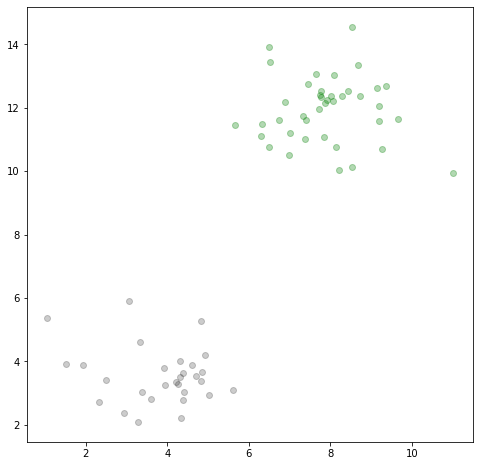

In [34]:
plt.figure(figsize=(8,8))
plt.scatter(c1[:,0], c1[:, 1], c="green", alpha=0.3)
plt.scatter(c2[:,0], c2[:, 1], c='black', alpha=0.2)


# for pt1 in c2:
#     if pt2 in c2:
#         plt.plot([pt1[0], pt2[0]], [pt1[1], pt2[1]], 'r-', alpha=0.3)
        

In [88]:
pt_id = 10
compute_a(c2, pt_id)

1.3750303006078057

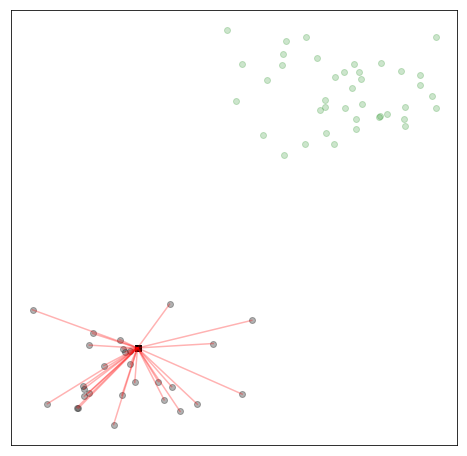

In [89]:
pt_id = 10
pt = c2[10]
plt.figure(figsize=(8,8))
plt.scatter(c1[:,0], c1[:, 1], c="green", alpha=0.2)
plt.scatter(c2[:,0], c2[:, 1], c='black', alpha=0.3)

plt.xticks([], [])
plt.yticks([], [])

for other_pt in c2:
    if other_pt_id !=  point_id:
        plt.plot([pt[0], other_pt[0]], [pt[1], other_pt[1]], 'r-', alpha=0.3)
        
plt.scatter(pt[0], pt[1], c='k', marker="s", alpha=1)    


In [97]:
compute_b(pt, c2)

(array([4.25838338, 4.80299801]), 0.0)

In [136]:
def pt_silhouette(cluster, target_pt_id, other_cluster):
    a_i = compute_a(cluster, target_pt_id)
    _, b_i = compute_b(cluster[target_pt_id], other_cluster)
    return (b_i - a_i) / max(a_i, b_i)

pt_silhouette(c2, pt_id, c1)    

0.7268230036476053

In [137]:
pt_id_c1 = 21
pt_c1 = c1[21]
print(compute_a(c1, pt_id_c1))
print(compute_b(pt_id_c1, c2)[1])
pt_silhouette(c1, pt_id, c2)

2.6981120218302315
21.759467543982822


0.3570589076309269

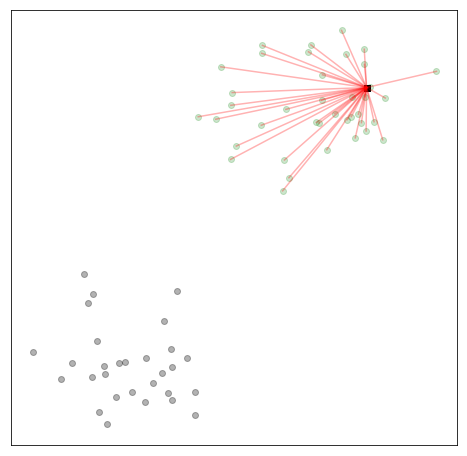

In [138]:
pt_id = 21
pt = c1[10]
plt.figure(figsize=(8,8))
plt.scatter(c1[:,0], c1[:, 1], c="green", alpha=0.2)
plt.scatter(c2[:,0], c2[:, 1], c='black', alpha=0.3)

plt.xticks([], [])
plt.yticks([], [])

for other_pt in c1:
    if other_pt_id !=  point_id:
        plt.plot([pt[0], other_pt[0]], [pt[1], other_pt[1]], 'r-', alpha=0.3)
        
plt.scatter(pt[0], pt[1], c='k', marker="s", alpha=1)    


### Computig Cluster-Wide Silhouette Coefficient

* Average over the silhouette coefficients for all data points

  * Provides a good estimator of the quality of the overall clustering
 

### Using Silhouettes to Decide on Best Number of Cluster 

* Silhouette coefficient can be useful to determine the number of clusters present in the dataset

* Run the algorithm several times for each possible value of $k$ and compute the overall silhouette coefficient each time

  * We should observe a peak at the best value of $k$

### Question

* Why do we need to Run the $k$-Means algorithm *several times* for each value of $k$ we would like to test?

In [139]:
# For simplicity, the solution assumes two clusters 
# Need to considers additional clusters in solution
def cluster_silhouette(cluster, other_cluster):
    silhouette_coeffs = []
    for pt_id in range(len(cluster)):
        silhouette_coeffs.append(pt_silhouette(cluster, pt_id, other_cluster))
    return(np.mean(silhouette_coeffs))
            
                

In [148]:
print(cluster_silhouette(c1, c2), cluster_silhouette(c2, c1))
np.mean([cluster_silhouette(c1, c2), cluster_silhouette(c2, c1)])

0.6534134308853174 0.6904926432489982


0.6719530370671578

([], [])

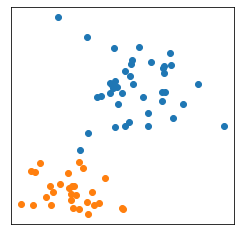

In [67]:
mean_c1 = [8, 12]
cov_c1 = [[6,0], [0, 9]]
c1 = np.random.multivariate_normal(mean_c1, cov_c1, 40)

mean_c2 = [4, 4]
cov_c2 = [[2,0], [0, 2]]
c2 = np.random.multivariate_normal(mean_c2, cov_c2, 29)



plt.figure(figsize=(4,4))
plt.scatter(c1[:,0], c1[:, 1])
plt.scatter(c2[:,0], c2[:, 1])

plt.xticks([], [])
plt.yticks([], [])


In [158]:
print(cluster_silhouette(c1, c2), cluster_silhouette(c2, c1))
np.mean([cluster_silhouette(c1, c2), cluster_silhouette(c2, c1)])

0.08026534373225395 0.08920863624598391


0.08473698998911894

([], <a list of 0 Text yticklabel objects>)

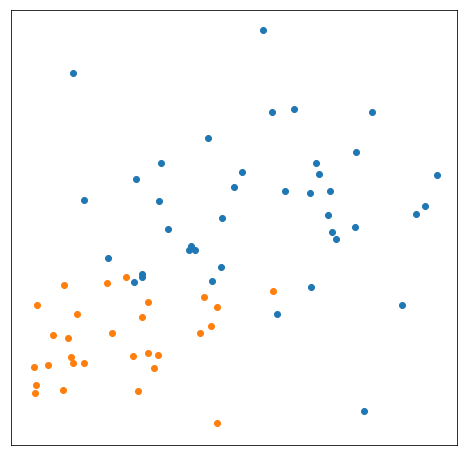

In [160]:
mean_c1 = [8, 12]
cov_c1 = [[8,0], [0, 13]]
c1 = np.random.multivariate_normal(mean_c1, cov_c1, 40)

mean_c2 = [4, 4]
cov_c2 = [[4,0], [0, 4]]
c2 = np.random.multivariate_normal(mean_c2, cov_c2, 29)



plt.figure(figsize=(8,8))
plt.scatter(c1[:,0], c1[:, 1])
plt.scatter(c2[:,0], c2[:, 1])

plt.xticks([], [])
plt.yticks([], [])


In [161]:
print(cluster_silhouette(c1, c2), cluster_silhouette(c2, c1))
np.mean([cluster_silhouette(c1, c2), cluster_silhouette(c2, c1)])

-0.19031767325037774 -0.06837193910062084


-0.1293448061754993